In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from matplotlib import pyplot as plt 
import pandas as pd
from scipy.stats import zscore

##### load data

In [8]:
data = pd.read_csv('data/cas_intensities.csv', delimiter=',', index_col = 0)
# only use first repliate
data = data[data["replicate"]==1]
ms_data = data.drop(columns=["replicate"])
data_dist = ms_data.copy()
data_dist["sum"] = data_dist.apply(lambda row:row.sum(), axis=1)
data_dist['median']= data_dist.apply(lambda row:row[:-1].median(), axis=1)
data_dist['mean']= data_dist.apply(lambda row:row[:-2].mean(), axis=1)
data_norm = data_dist.apply(lambda row: row[:-3]/row['mean'],axis=1)
data_norm.index = data_dist.index
data_norm2 = data_norm.apply(lambda col:col/col.median(),axis=0)
ms_data = data_norm2

In [9]:
import numpy as np
df = ms_data
scaled_data = 3 * ((df - df.mean()) / df.std())

# Clip values to be within -3 and 3
scaled_data = np.clip(scaled_data, -3, 3)

# Check mean and standard deviation
print(scaled_data.mean())
print(scaled_data.std())
print(scaled_data.min(), scaled_data.max())


6485-40-1     -0.435880
3033-23-6      0.075711
21284-22-0    -0.418053
38427-78-0    -0.383695
495-61-4      -0.413705
                 ...   
713-95-1      -0.224200
20307-84-0    -0.413705
120021-96-7   -0.413705
586-62-9      -0.325871
710-04-3      -0.163435
Length: 732, dtype: float64
6485-40-1      1.894324
3033-23-6      2.302065
21284-22-0     1.891729
38427-78-0     2.084914
495-61-4       2.058207
                 ...   
713-95-1       2.258621
20307-84-0     2.058207
120021-96-7    2.058207
586-62-9       2.155720
710-04-3       1.986596
Length: 732, dtype: float64
6485-40-1     -3.0
3033-23-6     -3.0
21284-22-0    -3.0
38427-78-0    -3.0
495-61-4      -3.0
              ... 
713-95-1      -3.0
20307-84-0    -3.0
120021-96-7   -3.0
586-62-9      -3.0
710-04-3      -3.0
Length: 732, dtype: float64 6485-40-1      3.0
3033-23-6      3.0
21284-22-0     3.0
38427-78-0     3.0
495-61-4       3.0
              ... 
713-95-1       3.0
20307-84-0     3.0
120021-96-7    3.0
586-62-9

In [10]:
panelist_data_df = pd.read_table("data/vlb_data_combined.txt", delimiter=',', index_col = 1)
panelist_data_df = panelist_data_df[panelist_data_df["panelist"]==1]
panelist_data_df = panelist_data_df.drop(columns=["panelist", "date"])

In [11]:
# get only comparable samplekeys
valid_indexes = [index for index in panelist_data_df.index if index in ms_data.index]
ms_data_comp = scaled_data.loc[valid_indexes].fillna(0)
panelist_data_comp = panelist_data_df.loc[valid_indexes]

In [12]:
# find CAS number to each molecule
CAS_to_mol = pd.read_table("data/CAS_mol_OD.csv", delimiter=',',  names= ["CAS","intensity", "odor"])
CAS_to_mol=CAS_to_mol.drop(columns=["intensity","odor"])
CAS_to_mol= CAS_to_mol.drop_duplicates()

In [13]:
# all molecules that where labeled as sweet in flavornet
sweet_descriptors = ["benzyl alcohol","ethyl phenylacetate","tridecanal","nerol","methyl hexanoate","linalyl isovalerate","undecanaldehyde","caryophyllene oxide","linalyl acetate","safranal","uncineol","phenylethanal","p-anisaldehyde","eudesmol","ethylmethyl pyrazine","citronellyl butyrate","4-methyl-3-penten-2-one","nonyl acetate","10-epi-γ-eudesmol","β-bisabolol","(Z)-6-dodecene-γ-lactone","β-farnesene","2-dodecenal","γ-dodecalactone","epoxy-β-ionone","2-undecenal","styrene glycol","methyl furaneol","(-)-cis-rose oxide","(E)-β-ocimene","dimethylmethoxyfuranone","1,8-cineole","ethylbenzaldehyde","2-pentylthiophene","α-farnesene","methionol","7-methoxycoumarin","(Z)-3-hexenyl-2-methylbutanoate","o-aminoacetophenone","viridiflorol","isopiperitone","β-sinensal","ethyl vanillate","methyl butanoate","p-methoxystyrene","ethanol","6-Methoxyeugenol","4-hexanolide","δ-dodecalactone","sesquiphellandrene","diethyl malate","linalyl butyrate","guaiacol","coumarin","methyl benzoate","isopropyl benzoate","safrole","durene","γ-butyrolactone","ethyl isobutyrate","furfural"]
fruit_descriptors = ["ethyl phenylacetate", "geranyl valerate", "γ-heptalactone", "ethyl propionate", "diethyl acetal", "geranyl butyrate", "ethyl heptylate", "ethyl octanoate", "methyl hexanoate", "dimethylheptenal", "pentanone", "ethyl 3-methylbutanoate", "geranyl isovalerate", "isobutyl acetate", "ethoxypropanol", "methyl-2-butenal", "methylnonanedione", "linalyl acetate", "methyl geranate", "limonene oxide", "hydrocinnamic alcohol", "diethyl succinate", "ethyl hexanoate", "ethylmethyl pyrazine", "β-cubebene", "neryl acetate", "citronellyl butyrate", "hexyl acetate", "nonyl acetate", "butyl methylbutyrate", "pentenal", "isopentyldimethylpyrazine", "p-menth-1-en-9-ol", "hexadecanone", "octyl acetate", "γ-dodecalactone", "epoxy-β-ionone", "ethyl octenoate", "ethyl isohexanoate", "isobornyl propionate", "cedrenol", "p-menth-1-en-9-yl acetate", "cadinadiene", "(Z)-3-hexenyl hexanoate", "ethyl cyclohexanoate", "4-methylthio-2-butanone", "3,5-octadienone", "methyl cyclohexanecarboxylate", "2-pentylthiophene", "α-ocimene", "butanediol", "ethyl valerate", "pentanol", "isopiperitone", "butyl octanoate", "ethyl vanillate", "methyl butanoate", "2-methylbutyl acetate", "propyl hexanoate", "butyl hexanoate", "isopropyl butanoate", "spathulenol", "butanol", "δ-dodecalactone", "methyl quinoxaline", "sesquiphellandrene", "2-hexenol", "ethyl benzoate", "isopropyl benzoate", "ethyl lactate", "citronellyl isobutyrate"]
wood_descriptors = ["α-muurolene","cadina-1,4-dien-3-ol","isocaryophyllene","eudesmol","α-ionone","bornyl butyrate","(E)-α-bergamotene","linalool oxide","ethyl pyrazine","10-epi-γ-eudesmol","germacrene B","trans-sabinene hydrate","dihydrolinalool","isodihydrocarveol","β-farnesene","β-sesquiphellandrene","δ-elemene","α-calacorene","epoxy-β-ionone","germacrene D","bicyclogermacrene","alloaromadendrene","α-thujene","oxo-β-ionone","(-)-γ-elemene","γ-muurolene","sabinene","α-guaiene","α-copaene","γ-cadinene","nerolidol","β-eudesmol","α-cadinol","δ-cadinene","dill apiol","aromadendrene","α-gurjunene","guaiol","α-farnesene","γ-selinene","cuminica lcohol","perillen","elemol","α-humulene","β-caryophyllene","β-guaiene"]
malt_descriptors = ["pentanal","3-methyl-1-butanol","2-methyl-1-butanol","methylbutanal","isobutyraldehyde"]

In [14]:
# find cas numbers for these molecules
sweet_descriptors_CAS = [CAS_to_mol.loc[index]["CAS"]for index in sweet_descriptors if index in CAS_to_mol.index ]
fruit_descriptors_CAS = [CAS_to_mol.loc[index]["CAS"] for index in fruit_descriptors if index in CAS_to_mol.index]
wood_descriptors_CAS = [CAS_to_mol.loc[index]["CAS"] for index in wood_descriptors if index in CAS_to_mol.index]
malt_descriptors_CAS  =[CAS_to_mol.loc[index]["CAS"] for index in malt_descriptors if index in CAS_to_mol.index]

### Basic example

In [ ]:
cas_range=np.linspace(-3,3,197)
#cas_range = np.array(ms_data_comp['6485-40-1'])
             
cas_001 = ctrl.Antecedent(cas_range, 'cas_001')
cas_002 = ctrl.Antecedent(cas_range, 'cas_002')
cas_003 = ctrl.Antecedent(cas_range, 'cas_003')

# Auto-membership function population is possible with .automf(3, 5, or 7)
cas_001.automf(3)
cas_002.automf(3)
cas_003.automf(3)

osa_sweet = ctrl.Consequent(np.arange(0, 100, 10), 'osa_sweet')
osa_sweet.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
# tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
# tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
# tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

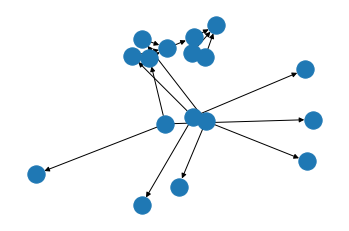

In [ ]:
rule_sweet_01 = (ctrl.Rule(cas_001['good'] | cas_002['good'] |cas_003['good'], osa_sweet['good']))
rule_sweet_02 = (ctrl.Rule(cas_001['average']|  cas_002['average'] | cas_003['average'], osa_sweet['average']))
rule_sweet_03 = (ctrl.Rule(cas_001['poor']| cas_002['poor'] |cas_003['poor'], osa_sweet['poor']))

rule_sweet_01.view()

cas_001 : 3
cas_002 : 3
cas_003 : 3

74.6341463414634


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


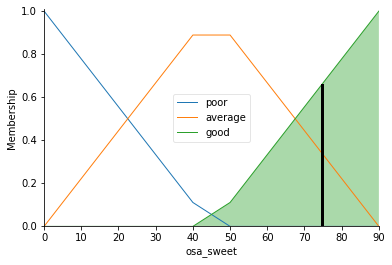

In [ ]:
tipping_ctrl = ctrl.ControlSystem([
    rule_sweet_01,
    rule_sweet_02,
    rule_sweet_03
])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)


tipping.input['cas_001'] = 3
tipping.input['cas_002'] = 3
tipping.input['cas_003'] = 3

print(tipping.input)
# Crunch the numbers
tipping.compute()

prediction = tipping.output['osa_sweet'] 

print( prediction )
osa_sweet.view(sim=tipping)

### Sweet

In [15]:
sweet_ms_df = ms_data_comp[sweet_descriptors_CAS]

In [19]:
cas_antecedents = {}
for cas in ms_data_comp.columns:
    cas_name = str(cas)  
    cas_antecedent = ctrl.Antecedent(np.sort(np.array(ms_data_comp[cas])), cas_name)
    cas_antecedent.automf(3)
    cas_antecedents[cas_name] = cas_antecedent


In [20]:
# osa_sweet = ctrl.Consequent(np.arange(0, 100, 10), 'osa_sweet')
# osa_sweet.automf(3)

osa_sweet = ctrl.Consequent(np.arange(0, 101, 1), 'osa_sweet')

osa_sweet['low'] =fuzz.trapmf(osa_sweet.universe, [ 0,0,20, 40])
osa_sweet['medium'] = fuzz.trimf(osa_sweet.universe, [20, 50, 80])
osa_sweet['high'] = fuzz.trapmf(osa_sweet.universe,  [ 60, 80, 100,100 ])

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


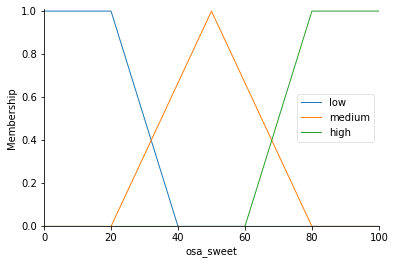

In [21]:
osa_sweet.view()

In [22]:
from functools import reduce

def create_rules(score):
    antecedent_list = []
    for cas_sweet in cas_antecedents:
        if(cas_sweet in sweet_descriptors_CAS):
            antecedent_list.append(cas_antecedents[cas_sweet][score])

    return(reduce(lambda x, y: x | y, antecedent_list))



rules: 

if one sweet cas is good than contributes to osa good

analog with average an poor

In [23]:
rule_sweet = ctrl.Rule(create_rules('good'), osa_sweet['high'])
rule_average = ctrl.Rule(create_rules('average'), osa_sweet['medium'])
rule_low = ctrl.Rule(create_rules('poor'), osa_sweet['low'])

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


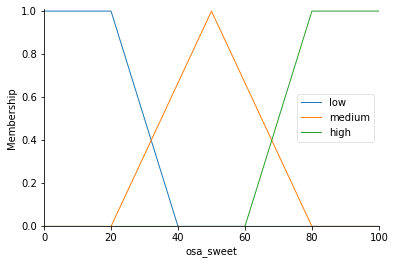

In [24]:
osa_sweet.view()

50.0


c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


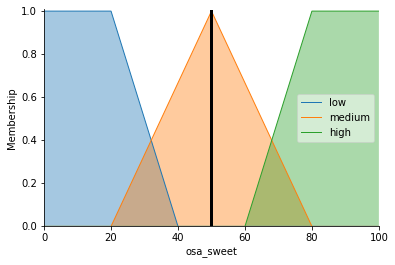

In [27]:
tipping_ctrl = ctrl.ControlSystem([
    rule_sweet,
    rule_average,
    rule_low
])

tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)

for input in sweet_descriptors_CAS:
    #tipping.input[input] = ms_data_comp.loc["000838"][input]
    tipping.input[input] = -3000

#print(tipping.input)
# Crunch the numbers
tipping.compute()

prediction = tipping.output['osa_sweet'] 

print( prediction )
osa_sweet.view(sim=tipping)